# Setul de date

---



Datele constau din imagini de 48x48 pixeli în tonuri de gri ale fețelor.

Scopul este de a clasifica fiecare față în funcție de emoția afișată în expresia facială într-una dintre cele șapte categorii.

`[0 = Furios, 1 =  Dezgustat, 2 = Înfricoșat, 3 = Fericit, 4 = Trist, 5 = Surprins, 6 = Neutru]`

Setul de date conține două coloane, "emoție" și "pixeli".

Coloana "emoție" conține un cod numeric cuprins între 0 și 6, inclusiv, pentru emoția care este prezentă în imagine.

Coloana "pixeli" conține un șir înconjurat între ghilimele pentru fiecare imagine. Conținutul acestui șir are valori de pixeli separate de spațiu în ordinea majoră a rândurilor.

In [ ]:
""" Montăm unitatea Google Drive la sesiunea curentă pentru a permite accesul la
fișierele și directoarele din unitatea Google Drive direct din notebook-ul Colab """


from google.colab import drive
drive.mount('/content/drive')
my_data_folder = ('/content/drive/MyDrive/Licenta/Data/')

Mounted at /content/drive


In [ ]:
""" Importarea dependențelor necesare """

# NumPy pentru calcul numeric
# Pandas pentru DataFrame-uri
# Matplotlib pentru vizualizare
# %matplotlib inline pentru afișarea graficelor în notebook
# Seaborn pentru o vizualizare mai ușoară a datelor


import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns

In [ ]:
# Citim datele din .csv
df = pd.read_csv(my_data_folder + "fer2013/fer2013.csv")
print("df.shape = ", df.shape, end="\n\n")
print(df)

df.shape =  (35887, 3)

       emotion                                             pixels        Usage
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...     Training
1            0  151 150 147 155 148 133 111 140 170 174 182 15...     Training
2            2  231 212 156 164 174 138 161 173 182 200 106 38...     Training
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...     Training
...        ...                                                ...          ...
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest

[35887 rows x 3 columns]


# Vizualizarea datelor
---

Furios        4953
Dezgustat      547
Infricosat    5121
Fericit       8989
Trist         6077
Surprins      4002
Neutru        6198
Name: emotion, dtype: int64


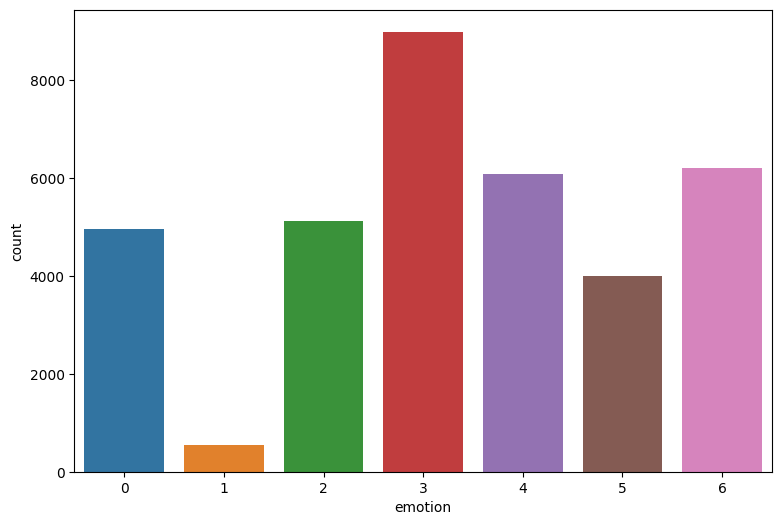

In [ ]:
""" Plotarea emoțiilor """

# Definește dimensiunea graficului
plt.figure(figsize=(9, 6))
# Arată numărul de apariții al fiecărei valori din coloana 'emotion'
sns.countplot(x='emotion', data=df)
emotion_counts = df['emotion'].value_counts().sort_index()
emotion_labels = {
    0: 'Furios',
    1: 'Dezgustat',
    2: 'Infricosat',
    3: 'Fericit',
    4: 'Trist',
    5: 'Surprins',
    6: 'Neutru'
}
emotion_counts = emotion_counts.rename(emotion_labels)
print(emotion_counts)

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

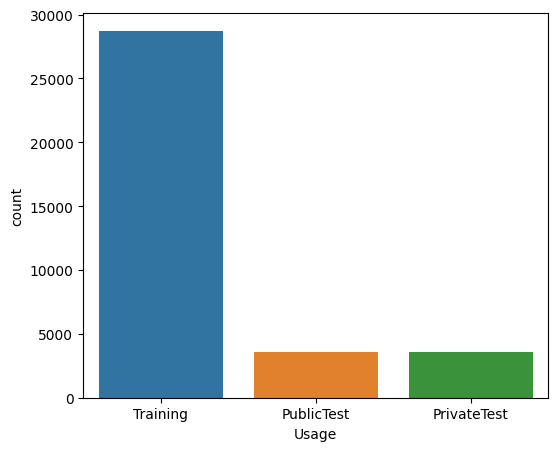

In [ ]:
""" Plotarea întrebuințării asociate imaginilor """

plt.figure(figsize=(6, 5))
sns.countplot(x='Usage', data=df)
df['Usage'].value_counts()

# Preprocesarea datelor
---

In [ ]:
import cv2


width, height = 48, 48
image_size = (width, height)

# Conversia elementului de coloană relevant într-o listă pentru fiecare rând
pixels = df['pixels'].tolist()

faces = []

for pixel_seq in pixels:
    # Se împărte șirul de caractere după spații ca o listă
    face = [int(pixel) for pixel in pixel_seq.split(' ')]
    # Conversia listei în matrice numpy cu dimensiunea de 48*48
    face = np.asarray(face).reshape(width, height)
    # Redimensionarea imaginii pentru a avea 48 de coloane (lățime) și 48 de rânduri (înălțime)
    face = cv2.resize(face.astype('uint8'), image_size)
    # Creeză lista fiecărei imagini de 48*48 și pixelii ei în formă de numpyarray
    faces.append(face.astype('float32'))

# Conversia listei în matrice numpy
faces = np.asarray(faces)
# Extinde forma array-ul,  -1 = ultima dimensiune (canalul de culoare)
faces = np.expand_dims(faces, -1)
# Efectuarea unui tip de codificare one-hot pentru coloana "emotion"
emotions = pd.get_dummies(df['emotion']).to_numpy()

In [ ]:
# Pixelii după preprocesare
print(type(faces))
print(faces.shape)
print(faces[0].ndim)
print(faces[0])

<class 'numpy.ndarray'>
(35887, 48, 48, 1)
3
[[[ 70.]
  [ 80.]
  [ 82.]
  ...
  [ 52.]
  [ 43.]
  [ 41.]]

 [[ 65.]
  [ 61.]
  [ 58.]
  ...
  [ 56.]
  [ 52.]
  [ 44.]]

 [[ 50.]
  [ 43.]
  [ 54.]
  ...
  [ 49.]
  [ 56.]
  [ 47.]]

 ...

 [[ 91.]
  [ 65.]
  [ 42.]
  ...
  [ 72.]
  [ 56.]
  [ 43.]]

 [[ 77.]
  [ 82.]
  [ 79.]
  ...
  [105.]
  [ 70.]
  [ 46.]]

 [[ 77.]
  [ 72.]
  [ 84.]
  ...
  [106.]
  [109.]
  [ 82.]]]


In [ ]:
# Emoțiile după preprocesare
print(type(emotions))
print(emotions.shape)
print(emotions.ndim)
print(emotions[0])

<class 'numpy.ndarray'>
(35887, 7)
2
[1 0 0 0 0 0 0]


# Împărțirea setului de date
### Scalarea pixelilor in intervalul [-1, 1]
---

In [ ]:
# Împărțirea pixelilor la 255 pentru normalizare (interval (0, 1))
x = faces.astype('float32')
x = x / 255.0


# Scalarea valorii pixelilor în intervalul (-1,1)
x = x - 0.5
x = x * 2.0


# Se poate observa că pixelii sunt la scară
print(x.min(),x.max())

-1.0 1.0


In [ ]:
type(x)
print(x[0])

[[[-0.45098037]
  [-0.372549  ]
  [-0.35686272]
  ...
  [-0.5921569 ]
  [-0.6627451 ]
  [-0.6784314 ]]

 [[-0.49019605]
  [-0.52156866]
  [-0.54509807]
  ...
  [-0.56078434]
  [-0.5921569 ]
  [-0.654902  ]]

 [[-0.60784316]
  [-0.6627451 ]
  [-0.5764706 ]
  ...
  [-0.6156863 ]
  [-0.56078434]
  [-0.6313726 ]]

 ...

 [[-0.2862745 ]
  [-0.49019605]
  [-0.67058825]
  ...
  [-0.4352941 ]
  [-0.56078434]
  [-0.6627451 ]]

 [[-0.3960784 ]
  [-0.35686272]
  [-0.38039213]
  ...
  [-0.17647058]
  [-0.45098037]
  [-0.6392157 ]]

 [[-0.3960784 ]
  [-0.4352941 ]
  [-0.34117645]
  ...
  [-0.16862744]
  [-0.14509803]
  [-0.35686272]]]


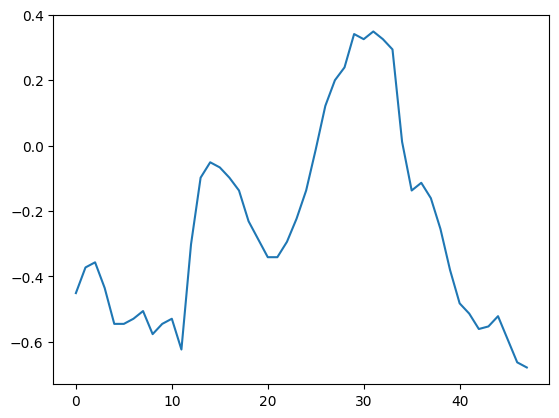

In [ ]:
plt.plot(x[0,0])
plt.show()

# Împărțirea setului de date în set de antrenare și set de validare
---

In [ ]:
num_samples, num_classes = emotions.shape # Returnează numărul de eșantioane și numărul de clase


num_train_samples = int((1 - 0.2) * num_samples) # Numărul de eșantioane de antrenament dorite


# Date de antrenare
train_x = x[:num_train_samples]
train_y = emotions[:num_train_samples]


# Date de validare
val_x = x[num_train_samples:]
val_y = emotions[num_train_samples:]


train_data = (train_x, train_y)
val_data = (val_x, val_y)


# Pixelii au 4 dimensiuni [numărul de imagini, lățimea, înălțimea, culoarea]
print('Training Pixels:', train_x.shape)
print('Training labels:', train_y.shape)
print('Validation Pixels:', val_x.shape)
print('Validation labels:', val_y.shape)

Training Pixels: (28709, 48, 48, 1)
Training labels: (28709, 7)
Validation Pixels: (7178, 48, 48, 1)
Validation labels: (7178, 7)


# Definirea modelului
---

In [ ]:
""" Importarea dependențelor necesare pentru a construi modelul """
# Keras este o bibliotecă pentru deep learning

from keras import layers
from keras.layers import Activation, AveragePooling2D, BatchNormalization, Convolution2D, Conv2D, Dropout
from keras.layers import Flatten, Input, GlobalAveragePooling2D, MaxPooling2D, SeparableConv2D
from keras.models import Sequential, Model
from keras.regularizers import l2

In [ ]:
""" Construirea arhitecturii modelului """

input_shape=(48, 48, 1)
num_classes = 7


model = Sequential()
model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same', name='image_array', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.5))

model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.5))

model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.5))

model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.5))

model.add(Convolution2D(filters=256, kernel_size=(3, 3), padding='same'))

model.add(BatchNormalization())
model.add(Convolution2D(filters=num_classes, kernel_size=(3, 3), padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax', name='predictions'))

# afișează un rezumat al arhitecturii modelului
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_array (Conv2D)        (None, 48, 48, 16)        800       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 16)        12560     
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 16)       64        
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 48, 48, 16)        0         
                                                                 
 average_pooling2d (AverageP  (None, 24, 24, 16)       0

# Augmentarea datelor
---

In [ ]:
# Generarea de imagini augmentate pentru a extinde setul de date de antrenament și a îmbunătăți performanța modelului

from keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(
                        featurewise_center = False,
                        featurewise_std_normalization = False,
                        rotation_range = 15,
                        width_shift_range = 0.15,
                        height_shift_range = 0.15,
                        zoom_range = .15,
                        horizontal_flip = True)

In [ ]:
""" Configurare """
# Se specifică setările de antrenare ale modelului

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_array (Conv2D)        (None, 48, 48, 16)        800       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 16)        12560     
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 16)       64        
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 48, 48, 16)        0         
                                                                 
 average_pooling2d (AverageP  (None, 24, 24, 16)       0

# Antrenarea modelului
---

In [ ]:
""" Importarea dependențelor necesare pentru antrenarea modelului """
from keras.callbacks import CSVLogger, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


""" Parametri """
batch_size = 32 # Numărul de eșantioane dintr-o epocă
num_epochs = 150 # Numărul de epoci pentru antrenamentul modelului.
#input_shape = (64, 64, 1)
verbose = 1 # Bară de progres pe epoci
num_classes = 7
patience = 50
datasets = ['fer2013']
base_path = my_data_folder + "result/"


for dataset_name in datasets:
    print('Set de date de antrenare:', dataset_name)

    # Callback-uri
    log_file_path = dataset_name + '_emotion_training.log'

    # Se salvează jurnal CSV cu progresul antrenării
    csv_logger = CSVLogger(log_file_path, append=False)

    # Se oprește antrenarea prematură dacă performanța nu se îmbunătățește
    early_stop = EarlyStopping('val_loss', patience=patience)

    # Se reduce rata de învățare dacă performanța nu se îmbunătățește
    reduce_lr = ReduceLROnPlateau('val_loss',
                                  factor = 0.1,
                                  patience = int(patience/4),
                                  verbose = 1)

    # Se salvează modele în timpul antrenării
    trained_models_path = base_path + dataset_name + 'simple_cnn'
    model_names = trained_models_path + '.{epoch:03d}-{val_loss:.2f}.hdf5'
    model_checkpoint = ModelCheckpoint(model_names,
                                       'val_loss',
                                       verbose = 1,
                                       save_best_only = True)
    my_callbacks = [model_checkpoint, csv_logger, early_stop, reduce_lr]

    # Se încărcă setul de date
    train_faces, train_emotions = train_data
    history = model.fit(data_generator.flow(train_faces, train_emotions, batch_size),
                        epochs = num_epochs,
                        verbose = 1,
                        callbacks = my_callbacks,
                        validation_data = val_data)
    # Nu se folosește callbacks = [my_callbacks] deoarece my_callbacks este deja o listă

Set de date de antrenare: fer2013
Epoch 1/150
897/898 [============================>.] - ETA: 0s - loss: 1.3402 - accuracy: 0.4918
Epoch 1: val_loss improved from inf to 1.19990, saving model to /content/drive/MyDrive/Licenta/Data/result/fer2013simple_cnn.001-1.20.hdf5
898/898 [==============================] - 22s 25ms/step - loss: 1.3400 - accuracy: 0.4919 - val_loss: 1.1999 - val_accuracy: 0.5444 - lr: 0.0010
Epoch 2/150
896/898 [============================>.] - ETA: 0s - loss: 1.3373 - accuracy: 0.4907
Epoch 2: val_loss improved from 1.19990 to 1.15205, saving model to /content/drive/MyDrive/Licenta/Data/result/fer2013simple_cnn.002-1.15.hdf5
898/898 [==============================] - 21s 23ms/step - loss: 1.3373 - accuracy: 0.4906 - val_loss: 1.1521 - val_accuracy: 0.5598 - lr: 0.0010
Epoch 3/150
896/898 [============================>.] - ETA: 0s - loss: 1.3318 - accuracy: 0.4908
Epoch 3: val_loss did not improve from 1.15205
898/898 [==============================] - 20s 22ms/st

In [ ]:
# evaluate() returnează [loss, acc]
score = model.evaluate(val_x, val_y, verbose = 1)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1]*100)

225/225 [==============================] - 1s 5ms/step - loss: 1.0962 - accuracy: 0.5807
Test loss:  1.0962296724319458
Test accuracy:  58.066314458847046


# Istoricul antrenării modelului

In [ ]:
""" Metrice colectate de obiectul history """

history_dict = history.history
history_dict.keys()

In [ ]:
print(history_dict["accuracy"])

[0.4919014871120453, 0.4905778765678406, 0.4907868504524231, 0.49218013882637024, 0.49538472294807434, 0.49726566672325134, 0.49555888772010803, 0.49594202637672424, 0.49841514229774475, 0.5014455318450928, 0.5010972023010254, 0.5005050897598267, 0.4983454644680023, 0.5026646852493286, 0.5062524080276489, 0.5130795240402222, 0.5121042132377625, 0.5147514939308167, 0.5128705501556396, 0.5148211121559143, 0.516075074672699, 0.5159357786178589, 0.5153436064720154, 0.5152043104171753, 0.516980767250061, 0.5178864002227783, 0.518757164478302, 0.5144379734992981, 0.5167020559310913, 0.518339216709137, 0.520220160484314, 0.5214044451713562, 0.519035816192627, 0.5222055912017822, 0.5210909247398376, 0.5194886326789856, 0.519035816192627, 0.5189313292503357, 0.5196627974510193, 0.5206032991409302, 0.5235640406608582, 0.5223448872566223, 0.5225539207458496, 0.5230067372322083, 0.5212999582290649, 0.526664137840271, 0.5239471793174744, 0.5224494338035583, 0.5236337184906006, 0.5237730145454407, 0

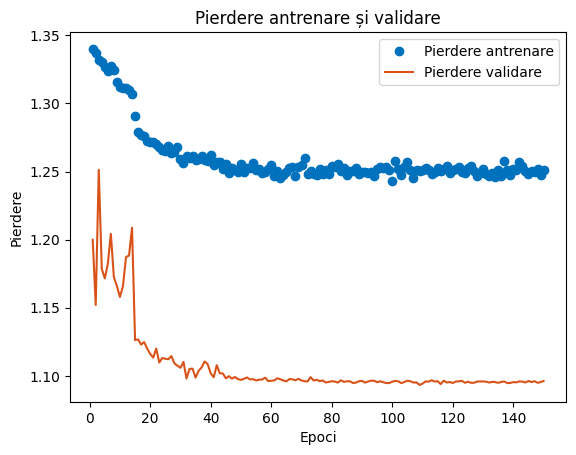

In [ ]:
""" Vizualizarea istoricului antrenării modelului """

import matplotlib.pyplot as plt

color_train = '#0072BD'  # Albastru
color_val = '#D95319'    # Portocaliu

train_loss = history_dict['loss']  # Valorile pierderii de antrenare
val_loss = history_dict['val_loss']  # Valorile pierderii de validare

epochs = range(1, len(history_dict['accuracy']) + 1) # Numărul de epoci

# Trasare puncte pentru pierderea de antrenare
plt.plot(epochs, train_loss, 'o', color=color_train, label='Pierdere antrenare')
# Trasare linie pentru pierderea de validare
plt.plot(epochs, val_loss, color=color_val, label='Pierdere validare')
plt.title('Pierdere antrenare și validare')  # Titlul graficului
plt.xlabel('Epoci')  # Eticheta axei x
plt.ylabel('Pierdere')  # Eticheta axei y
plt.legend()  # Afișarea legendei
plt.show()  # Afișarea graficului

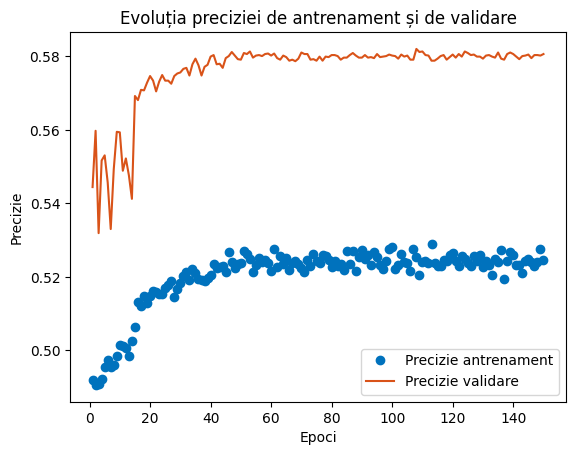

In [ ]:
train_acc = history_dict['accuracy'] # Valorile preciziei de antrenare
val_acc = history_dict['val_accuracy']  # Valorile preciziei de validare

# Trasare puncte pentru precizia de antrenare
plt.plot(epochs, train_acc, 'o', color=color_train, label='Precizie antrenament')
# Trasare linie pentru precizia de validare
plt.plot(epochs, val_acc, color=color_val, label='Precizie validare')
plt.title('Evoluția preciziei de antrenament și de validare') # Titlul graficului
plt.xlabel('Epoci') # Eticheta axei x
plt.ylabel('Precizie') # Eticheta axei y
plt.legend() # Afișarea legendei
plt.show() # Afișarea graficului

# Savarea modelului

In [ ]:
from keras.models import model_from_json

def save_model():
    # Se serializează modelul în format JSON
    model_json = model.to_json()
    with open(my_data_folder + "model/model1.json", "w") as json_file:
        json_file.write(model_json)

    # Se salvează greutățile modelului în format HDF5
    model.save_weights(my_data_folder + "model/model1.h5")
    print("Modelul a fost salvat!")

save_model()

Modelul a fost salvat!


# Încărcarea modelului

In [ ]:
def load_model():
    # Se deschide fișierul JSON care conține definirea modelului
    json_file = open(my_data_folder + "model/model.json", 'r')
    loaded_model_json = json_file.read()
    json_file.close()

    # Se crează modelul pe baza definirii din fișierul JSON
    model = model_from_json(loaded_model_json)

    # Se încărcă greutățile modelului în modelul creat
    model.load_weights(my_data_folder + "model/model.h5")

    print("Modelul a fost încărcat!")
    return model

# model = load_model()

# Testarea modelului

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

def predict_from_image(path):
    facecasc = cv2.CascadeClassifier( my_data_folder + 'haarcascade_frontalface_default.xml')
    image_path = my_data_folder + path
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detectează fețele în imaginea în tonuri de gri folosind clasificatorul în cascada pentru fețe.
    faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=10)
    print("Numărul de fețe din imagine: ",len(faces))
    i = 1
    for (x, y, w, h) in faces:
        # Se sesenează un dreptunghi roșu în jurul feței
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 6)
        # Se selectează regiunea de interes (ROI) a feței din imaginea în tonuri de gri
        roi_gray = gray[y:y + h, x:x + w]
        # Se redimensionează ROI-ul la dimensiunea 48x48 pixeli și ajustează dimensiunile pentru a se potrivi cu modelul
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        # Se realizează predicția emoției folosind modelul
        prediction = model.predict(cropped_img)
        # Se obține indexul emoției cu cea mai mare probabilitate din vectorul de predicții
        maxindex = int(np.argmax(prediction))
        # Afișează emoția asociată feței în consolă
        print("Persoana: ",i," : ", emotion_labels[maxindex])
        # Se scrie eticheta emoției pe imagine
        cv2.putText(image, str(i) + '-' + emotion_labels[maxindex], (x + 10, y - 20), cv2.FONT_HERSHEY_COMPLEX, 1.5, (255, 255, 255), 2)
        # Se incrementează numărul persoanei pentru a afișa corespunzător
        i+=1

    cv2_imshow(image)

Procesează imaginea: images/test/test_1.jpg
Numărul de fețe din imagine:  1
1/1 [==============================] - 0s 30ms/step
Persoana:  1  :  Furios


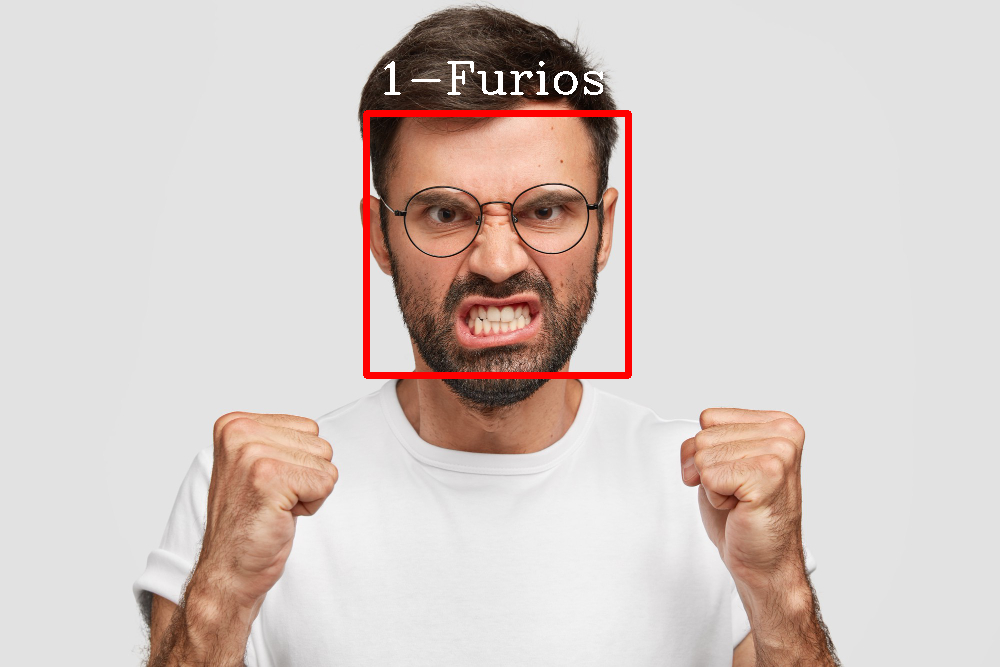

Procesează imaginea: images/test/test_2.jpg
Numărul de fețe din imagine:  1
1/1 [==============================] - 0s 27ms/step
Persoana:  1  :  Furios


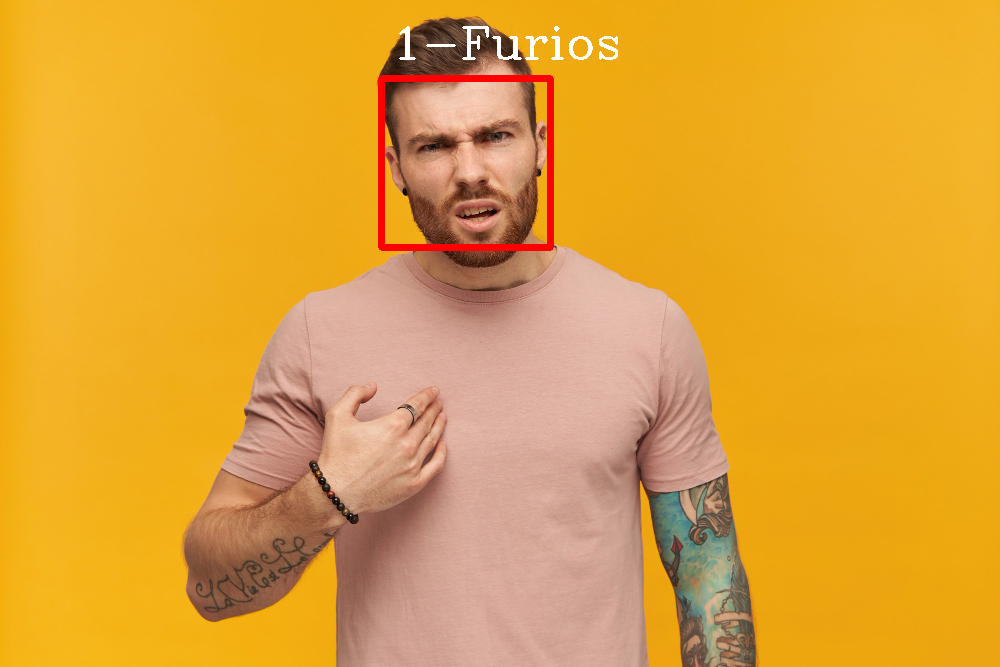

Procesează imaginea: images/test/test_3.jpg
Numărul de fețe din imagine:  1
1/1 [==============================] - 0s 34ms/step
Persoana:  1  :  Infricosat


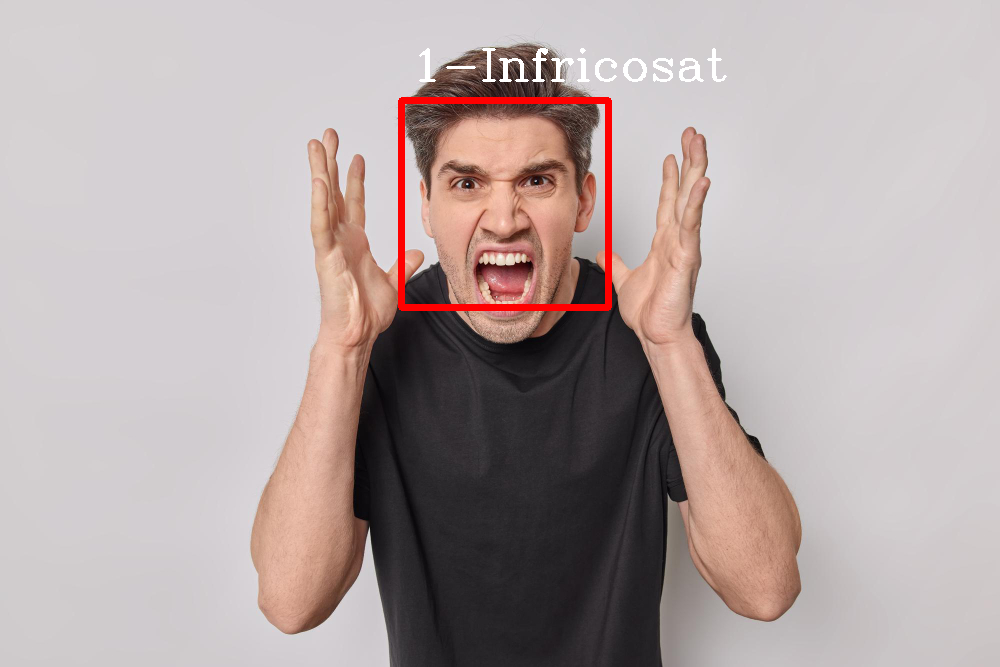

Procesează imaginea: images/test/test_4.jpg
Numărul de fețe din imagine:  1
1/1 [==============================] - 0s 20ms/step
Persoana:  1  :  Surprins


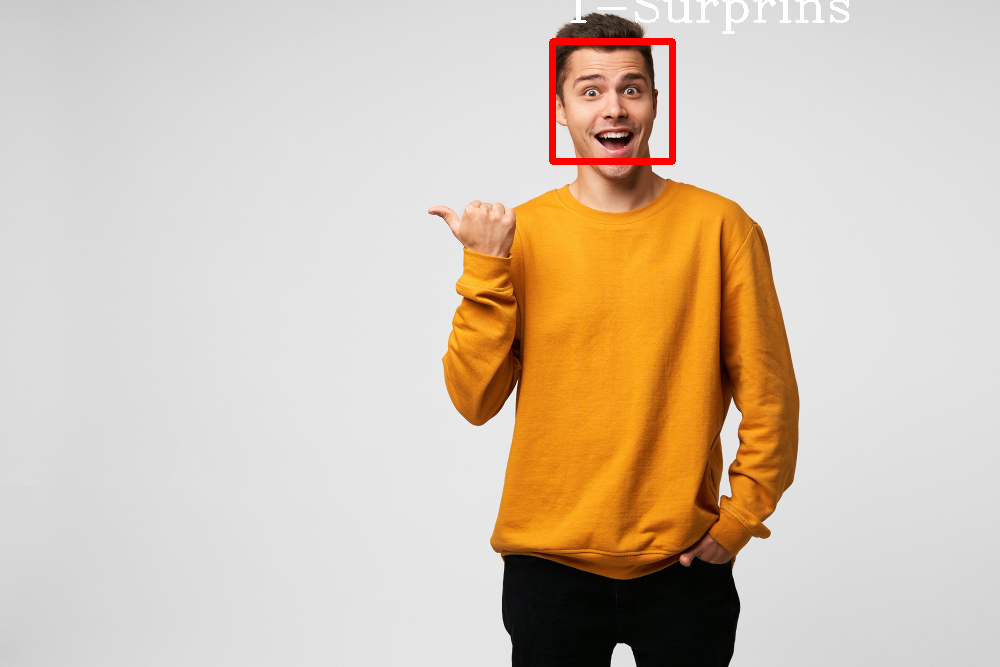

Procesează imaginea: images/test/test_5.jpg
Numărul de fețe din imagine:  1
1/1 [==============================] - 0s 20ms/step
Persoana:  1  :  Surprins


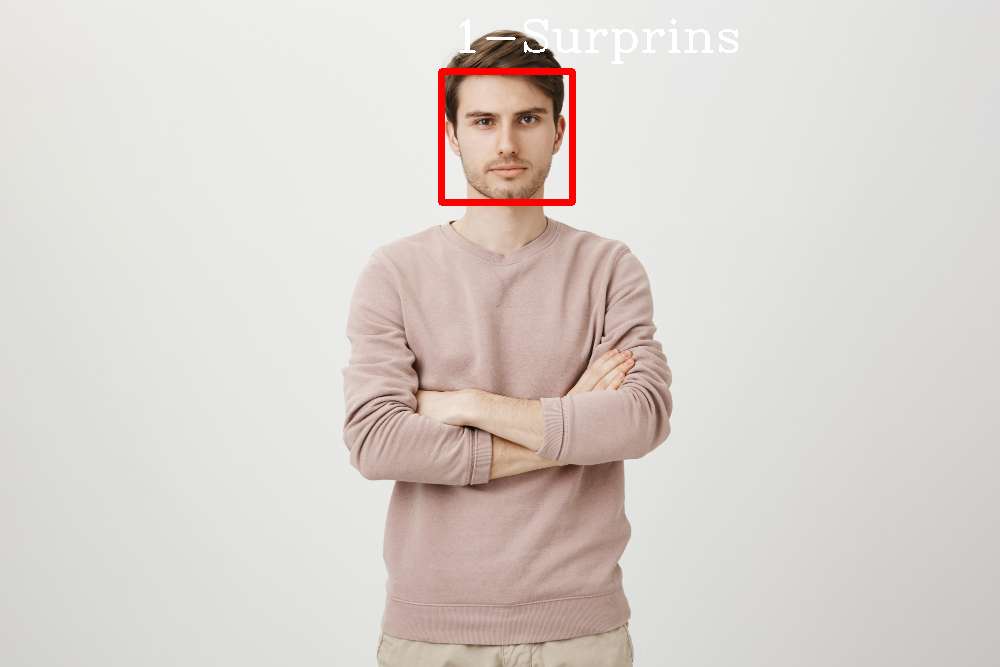

Procesează imaginea: images/test/test_6.jpg
Numărul de fețe din imagine:  1
1/1 [==============================] - 0s 26ms/step
Persoana:  1  :  Infricosat


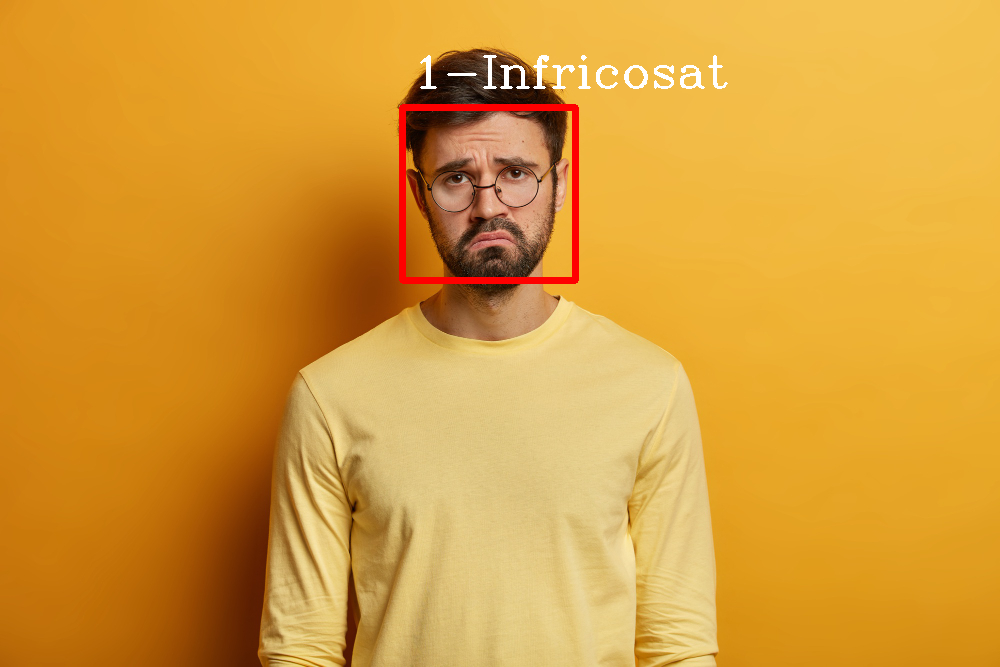

Procesează imaginea: images/test/test_7.jpg
Numărul de fețe din imagine:  1
1/1 [==============================] - 0s 30ms/step
Persoana:  1  :  Infricosat


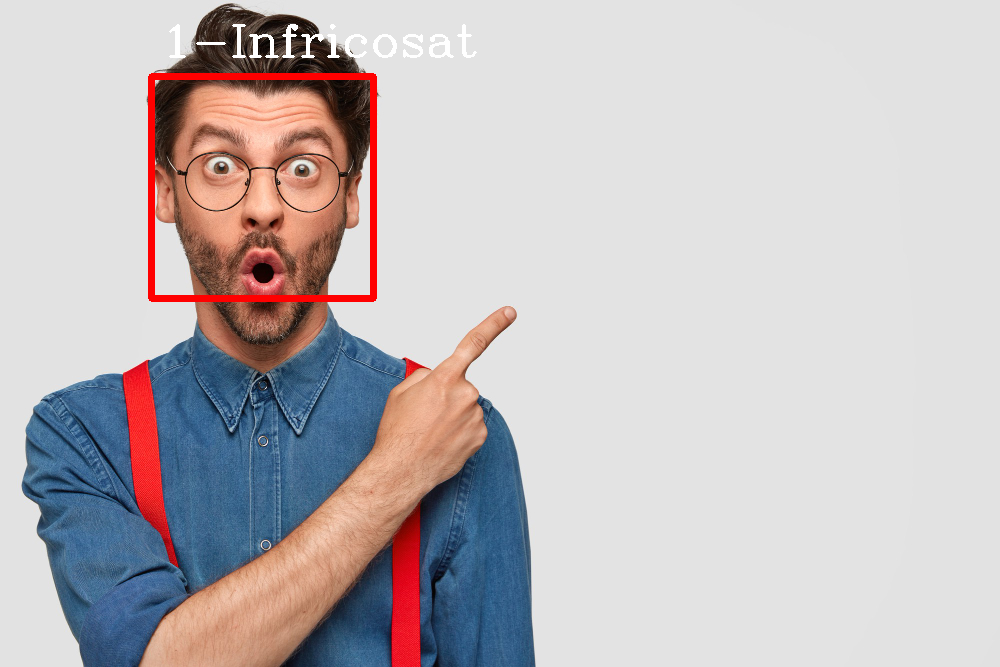

In [ ]:
# Teste
for i in range(1, 8):
    image_path = f"images/test/test_{i}.jpg"
    print(f"Procesează imaginea: {image_path}")
    predict_from_image(image_path)